In [13]:
import pickle
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import lzma

import csv

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import sklearn.model_selection


In [40]:
# load pickle model
model_names = ["lsvm_2_5", "mlp_c_2_3_1024_0.0005", "mlp_c_3_5_150_0.0005", "mlp_r_2_3_1024_0.0005", "perc_3_5_1024_0.0005", "svm_2_5"]
models = {}

with lzma.open("models/" + "lsvm_3_5" + ".pickle", "rb") as f:
    models["lsvm_3_5"] = pickle.load(f)


In [54]:
with lzma.open("models/" + "perc_3_5_1024_0.0005_relu" + ".pickle", "rb") as f:
    models["perc_3_5_1024_0.0005_relu"] = pickle.load(f)

In [41]:
def convert_dfficulty_class(name):
    if name == "Easy":
        return 0
    if name == "Medium":
        return 1
    if name == "Hard":
        return 2

In [42]:
SEED = 38



problems_without_html = []
with open('problems_without_html.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        problems_without_html.append(row)

problems = [problem[0] for problem in problems_without_html]
difficulty_classes = [convert_dfficulty_class(problem[1]) for problem in problems_without_html]

_, X_test, _, y_test = sklearn.model_selection.train_test_split(problems, difficulty_classes, random_state=SEED, stratify=difficulty_classes, test_size=0.2)


In [46]:
len(X_test)

474

In [58]:
my_text = "Given a list of cities find the shortest path visiting all of them once."

models['lsvm_3_5'].predict([my_text])[0]


1

In [43]:
# predict
y_pred_lsvm = models["lsvm_3_5"].predict(X_test)


In [44]:
# accuracy
print("Accuracy: " + str(accuracy_score(y_test, y_pred_lsvm)))

Accuracy: 0.5970464135021097


In [50]:
#f1 score
print("F1 score: " + str(f1_score(y_test, y_pred_lsvm, average='macro')))

F1 score: 0.522334760394313


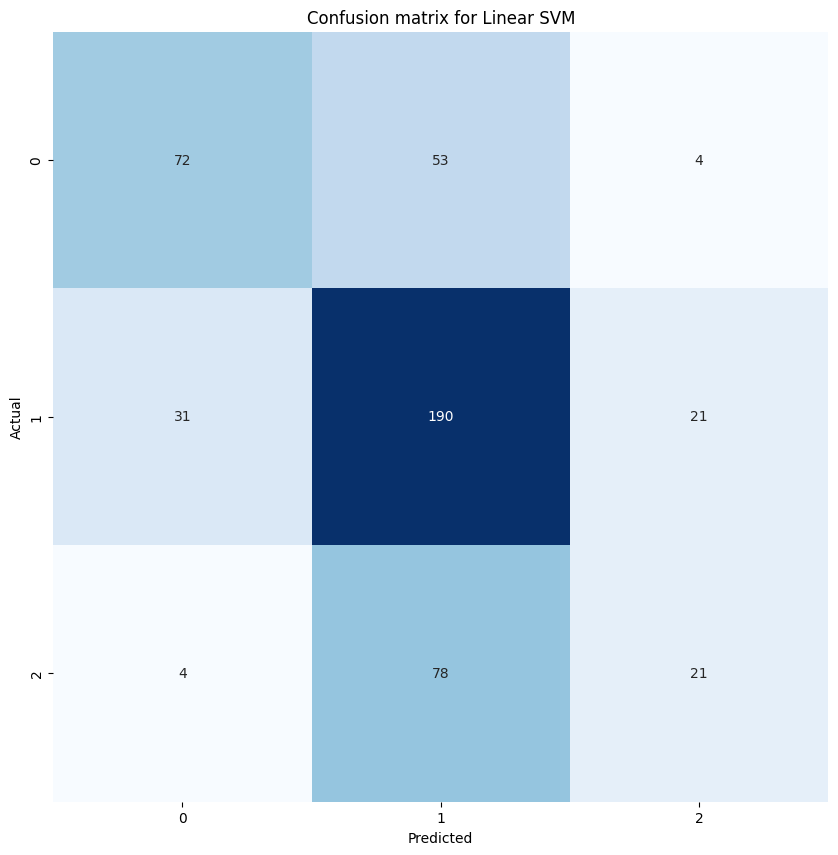

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lsvm)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix for Linear SVM")
plt.show()

Accuracy: 0.5675105485232067


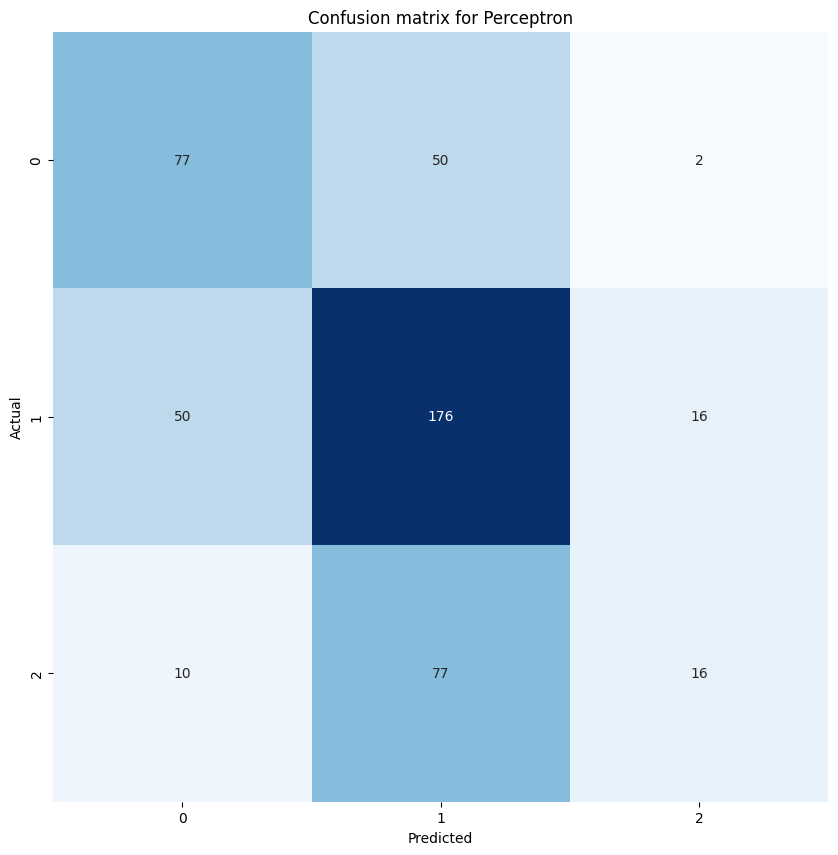

In [55]:
# perceptron

# predict
y_pred_perc = models["perc_3_5_1024_0.0005_relu"].predict(X_test)

# accuracy
print("Accuracy: " + str(accuracy_score(y_test, y_pred_perc)))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_perc)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix for Perceptron")
plt.show()